<a href="https://colab.research.google.com/github/ivydabiero/dsc-dvp-project02/blob/main/PROJECT%202%20UGANDA%20FOOD%20SECURITY%20IN%20KAMOJA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install streamlit # install the streamlit library
import geopandas as gpd
import pandas as pd
import folium
import plotly.express as px
import plotly.io as pio
import streamlit as st



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [8]:
import os

# Define the directory and file names
directory = 'src'
filename = '__init__.py'

# Create the 'src' directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Directory '{directory}' created.")
else:
    print(f"Directory '{directory}' already exists.")

# Create the file in the 'src' directory
file_path = os.path.join(directory, filename)
with open(file_path, 'w') as file:
    file.write('# This is an example file\n')
    print(f"File '{filename}' created in '{directory}'.")

# Optionally, you can list the contents of the directory to verify
print("Contents of 'src' directory:")
for item in os.listdir(directory):
    print(item)


Directory 'src' created.
File '__init__.py' created in 'src'.
Contents of 'src' directory:
__init__.py


In [9]:
import geopandas as gpd
import pandas as pd
!touch src/data_preprocessing # create an empty __init__.py file inside src
def load_shapefiles(subcounty_path: str, district_path: str) -> tuple:
    """Load shapefiles for subcounties and districts."""
    subcounty_gdf = gpd.read_file('/content/Uganda_Subcounties.shp')
    district_gdf = gpd.read_file('/content/Uganda_Districts.shp')
    return subcounty_gdf, district_gdf

def load_yield_data(subcounty_yield_path: str, district_yield_path: str) -> tuple:
    """Load crop yield data."""
    subcounty_df = pd.read_csv('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')
    district_df = pd.read_csv('/content/Uganda_Karamoja_District_Crop_Yield_Population.csv')
    return subcounty_df, district_df

def merge_data(subcounty_gdf: gpd.GeoDataFrame, subcounty_df: pd.DataFrame,
                district_gdf: gpd.GeoDataFrame, district_df: pd.DataFrame) -> tuple:
    """Merge shapefiles with yield data."""
    subcounty_merged = subcounty_gdf.merge(subcounty_df, left_on='subcounty_id', right_on='subcounty_id')
    district_merged = district_gdf.merge(district_df, left_on='district_id', right_on='district_id')
    return subcounty_merged, district_merged
    !ls



In [3]:
import folium
import plotly.express as px
import plotly.io as pio

def create_folium_map(geojson_data, color_col: str, save_path: str):
    """Create and save a Folium map with interactive GeoJSON data."""
    m = folium.Map(location=[4.5, 34.5], zoom_start=7)
    folium.GeoJson(
        geojson_data,
        name='geojson',
        style_function=lambda x: {
            'fillColor': '#00ff00' if x['properties'][color_col] > 0 else '#ff0000',
            'color': 'black',
            'weight': 1,
            'opacity': 0.7
        }
    ).add_to(m)
    folium.LayerControl().add_to(m)
    m.save(save_path)

def plot_yield_comparison(dataframe, title: str, x_col: str, y_cols: list, output_file: str):
    """Create a bar chart comparing different yield metrics."""
    fig = px.bar(
        dataframe,
        x=x_col,
        y=y_cols,
        title=title,
        labels={'value': 'Yield (Kg/Ha)', 'variable': 'Crop Type'},
        barmode='group'
    )
    fig.update_layout(xaxis_title='Subcounty Name', yaxis_title='S_Yield_Ha (Kg/Ha)')
    pio.write_html(fig, file=output_file, auto_open=False)


In [21]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_table
import folium
import plotly.express as px
import plotly.io as pio
import pandas as pd
import io
import base64
import streamlit as st

def create_dashboard():
    """Create and display an interactive dashboard."""

    # Load and merge data
    subcounty_gdf, district_gdf = load_shapefiles('', '')
    subcounty_df, district_df = load_yield_data('', '')
def merge_data(subcounty_gdf: gpd.GeoDataFrame, subcounty_df: pd.DataFrame,
                district_gdf: gpd.GeoDataFrame, district_df: pd.DataFrame) -> tuple:
    """Merge shapefiles with yield data."""
    subcounty_merged = subcounty_gdf.merge(subcounty_df, left_on='OBJECTID', right_on='OBJECTID') # Use subcounty_gdf instead of subcounty_shapefile
    district_merged = district_gdf.merge(district_df, left_on='OBJECTID', right_on='OBJECTID') # Use district_gdf instead of district_shapefile
    return subcounty_merged, district_merged    # Create and save map visualizations
    create_folium_map(subcounty_merged.to_json(), 'Maize_Yield', 'sorghum_yield_map.html')
    #Removed the docstring here as it was causing the unexpected indent error
    st.title("Food Security Monitoring Dashboard")

    st.markdown("### Sorghum and Maize Yield Maps")
    st.components.v1.csv(open('M Area Ha (Uganda Karamoja Subcounty Crop Yield Population.csv)', 'r').read(), height=600)
    st.components.v1.csv(open('S Area Ha (Uganda Karamoja Subcounty Crop Yield Population.csv)', 'r').read(), height=600)

    st.markdown("### Yield Comparison")
    st.components.v1.html(open('yield_comparison.html', 'r').read(), height=600)

if __name__ == "__main__":
    create_dashboard()

In [10]:
!touch src/__init__.py # ensure that this file exists and is in the src directory
!cd ..
import pytest
import geopandas as gpd
import pandas as pd


def test_load_shapefiles():
    subcounty, district = load_shapefiles('data/subcounty_shapefile.shp', 'data/district_shapefile.shp')
    assert isinstance(subcounty, gpd.GeoDataFrame)
    assert isinstance(district, gpd.GeoDataFrame)

def test_load_yield_data():
    subcounty_df, district_df = load_yield_data('data/subcounty_yield.csv', 'data/district_yield.csv')
    assert isinstance(subcounty_df, pd.DataFrame)
    assert isinstance(district_df, pd.DataFrame)

def test_merge_data():
    subcounty_gdf = gpd.read_file('data/subcounty_shapefile.shp')
    district_gdf = gpd.read_file('data/district_shapefile.shp')
    subcounty_df = pd.read_csv('data/subcounty_yield.csv')
    district_df = pd.read_csv('data/district_yield.csv')

    subcounty_merged, district_merged = merge_data(subcounty_gdf, subcounty_df, district_gdf, district_df)
    assert 'S_Yield_Ha' in subcounty_merged.columns
    assert 'S_Yield_Ha' in district_merged.columns

In [6]:
import plotly.express as px
import pandas as pd

def test_create_folium_map():
    df = pd.DataFrame({'subcounty_id': [1, 2], 'S_Yield_Ha': [100, 200]})
    geojson_data = pd.DataFrame({'geometry': [1, 2]}).reset_index()
    create_folium_map(geojson_data, 'S_Yield_Ha', 'test_map.html')
    # Check if the file exists and is not empty
    assert os.path.isfile('test_map.html')

def test_plot_yield_comparison():
    df = pd.DataFrame({
        'subcounty': ['A', 'B'],
        'S_Yield_Ha': [100, 150],
        'M_Yield_Ha': [50, 75]
    })
    plot_yield_comparison(df, "Yield Comparison", 'subcounty', ['S_Yield_Ha', 'M_Yield_Ha'], 'test_yield_comparison.html')
    # Check if the file exists and is not empty
    assert os.path.isfile('test_yield_comparison.html')


In [7]:
def test_create_dashboard():
    # Run the dashboard function
    create_dashboard()
    # Check if the HTML files exist
    assert os.path.isfile('sorghum_yield_map.html')
    assert os.path.isfile('sorghum_yield_district_map.html')
    assert os.path.isfile('yield_comparison.html')


geopandas
pandas
folium
plotly
streamlit
pytest


In [11]:
# Food Security Monitoring Tool
!git clone https://github.com/ivydabiero/food_security_tool.git

Cloning into 'food_security_tool'...
fatal: could not read Username for 'https://github.com': No such device or address


In [12]:
cd food_security_tool


[Errno 2] No such file or directory: 'food_security_tool'
/content


In [13]:
'streamlit run create_dashboard()'

'streamlit run create_dashboard()'

In [14]:
subcounty_gdf, district_gdf = load_shapefiles('', '')
subcounty_df, district_df = load_yield_data('', '')

In [15]:
subcounty_df

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,6.007239e+05
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,9.592014e+05
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9.991488e+03
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,3.897166e+04
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,2.216095e+05
5,268,RENGEN,KOTIDO,41273,652744859,Y,271.185843,1047.180128,13278.520430,12964.499730,171.585704,3.515789e+06,1.796811e+05
6,591,KAABONG EAST,KAABONG,42221,60801942,Y,160.588525,650.123565,1021.316990,1004.647534,15.660409,1.613349e+05,1.018120e+04
7,592,KAABONG TOWN COUNCIL,KAABONG,38857,13071455,Y,212.210703,1229.213444,175.080527,156.503888,18.526186,3.321180e+04,2.277264e+04
8,593,KAABONG WEST,KAABONG,41454,67612362,Y,208.040518,1056.416068,967.336727,910.254122,56.275355,1.893697e+05,5.945019e+04
9,594,KALAPATA,KAABONG,99203,223116860,Y,209.809352,633.423182,2834.349905,2501.368282,331.225795,5.248105e+05,2.098061e+05


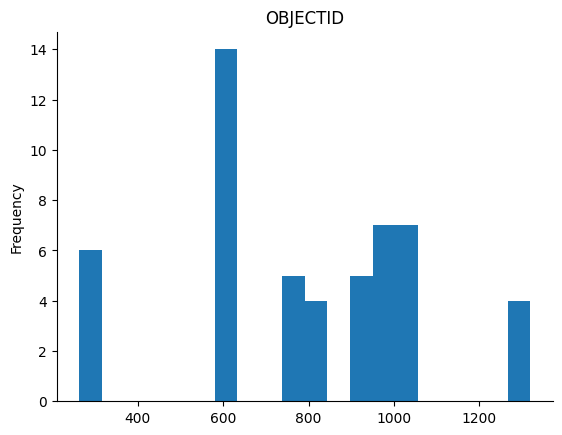

In [16]:
# @title OBJECTID

from matplotlib import pyplot as plt
subcounty_df['OBJECTID'].plot(kind='hist', bins=20, title='OBJECTID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
def create_folium_map(geojson_data, color_col: str, save_path: str):
    """Create and save a Folium map with interactive GeoJSON data."""
    m = folium.Map(location=[4.5, 34.5], zoom_start=7)
    folium.GeoJson(
        geojson_data,
        name='geojson',
        style_function=lambda x: {
            'fillColor': '#00ff00' if x['properties'][color_col] > 0 else '#ff0000',
            'color': 'grey',
            'weight': 1,
            'opacity': 0.7
        }
    ).add_to(m)
    folium.LayerControl().add_to(m)
    m.save(save_path)


In [18]:
pip install dash pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 50.3 MB/s eta 0:00:00


In [19]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px
from dash import dash_table

# Sample Data
data = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Value': [10, 20, 15, 25, 30, 22, 28, 34, 29, 40]
})

# Initialize Dash App
app = dash.Dash(__name__)

# Create a Plotly figure
fig = px.line(data, x='Date', y='Value', title='Sample Line Chart')

# Layout of the Dashboard
app.layout = html.Div([
    html.H1('Simple Dashboard'),

    html.Div([
        html.H2('Data Table'),
        dash_table.DataTable(
            data.to_dict('records'),
            columns=[{'name': col, 'id': col} for col in data.columns],
            style_table={'overflowX': 'auto'},
            style_cell={'textAlign': 'left'},
        )
    ]),

    html.Div([
        html.H2('Line Chart'),
        dcc.Graph(
            id='line-chart',
            figure=fig
        )
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<ipython-input-19-8dbb5e5ea562>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-19-8dbb5e5ea562>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<IPython.core.display.Javascript object>

In [59]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_table
import folium
import plotly.express as px
import plotly.io as pio
import pandas as pd
import io
import base64

# Sample data
data = pd.read_csv('/content/Uganda_Karamoja_Subcounty_Crop_Yield_Population.csv')

# Sample GeoJSON data (this would be replaced with actual GeoJSON data)
geojson_data = {
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "properties": {"name": "A", "color_col": 1},
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [34, 4],
                    [35, 4],
                    [35, 5],
                    [34, 5],
                    [34, 4]
                ]]
            }
        },
        {
            "type": "Feature",
            "properties": {"name": "B", "color_col": -1},
            "geometry": {
                "type": "Polygon",
                "coordinates": [[
                    [35, 4],
                    [36, 4],
                    [36, 5],
                    [35, 5],
                    [35, 4]
                ]]
            }
        }
    ]
}

# Create a folium map and save it to an HTML file
# Create a folium map and save it to an HTML file
def create_folium_map(geojson_data, color_col: str, save_path: str):
  m = folium.Map(location=[4.5, 34.5], zoom_start=7) # Changed location to a default value
  folium.GeoJson(
        geojson_data,
        name='COLLECT([Geometry (Uganda Subcounties.shp)]', # Added indentation and corrected the syntax error
        style_function=lambda x: {
            'fillColor': '#00ff00' if x['properties'][color_col] > 0 else '#ff0000',
            'color': 'black',
            'weight': 1,
            'opacity': 0.7
        }
    ).add_to(m) # Added indentation and corrected the syntax error
  folium.LayerControl().add_to(m)
  m.save(save_path)

# Create a Plotly bar chart
# Create a Plotly bar chart
def plot_yield_comparison(dataframe, title: str, x_col: str, y_cols: list, output_file: str):
    """Create a bar chart comparing different yield metrics."""
    fig = px.bar(
        dataframe,
        x=x_col,
        y=y_cols,
        title=title,
        labels={'value': 'Yield (Kg/Ha)', 'variable': 'Crop Type'},
        barmode='group'
    )
    fig.update_layout(xaxis_title='Subcounty Name', yaxis_title='S_Yield_Ha (Kg/Ha)')
    pio.write_html(fig, file=output_file, auto_open=True)
# File paths for saving
folium_map_path = 'folium_map.html'
bar_chart_path = 'bar_chart.html'

# Create files
# Create files
create_folium_map(geojson_data, 'color_col', folium_map_path)
plot_yield_comparison(data, "Subcounty df", 'OBJECTID', ['S_Yield_Ha', 'M_Yield_Ha'], bar_chart_path)

# Convert HTML files to base64
def encode_file_to_base64(file_path):
    with open(file_path, 'rb') as file:
        return base64.b64encode(file.read()).decode()

folium_map_base64 = encode_file_to_base64(folium_map_path)
bar_chart_base64 = encode_file_to_base64(bar_chart_path)

# Initialize Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Interactive Dashboard'),

    html.Div([
        html.H2('Folium Map'),
        html.Iframe(src=f"data:text/html;base64,{folium_map_base64}", style={'width': '100%', 'height': '500px'})
    ]),

    html.Div([
        html.H2('Bar Chart'),
        html.Iframe(src=f"data:text/html;base64,{bar_chart_base64}", style={'width': '100%', 'height': '500px'})
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [54]:
data

,OBJECTID,SUBCOUNTY_NAME,DISTRICT_NAME,POP,Area,Karamoja,S_Yield_Ha,M_Yield_Ha,Crop_Area_Ha,S_Area_Ha,M_Area_Ha,S_Prod_Tot,M_Prod_Tot
0,263,KACHERI,KOTIDO,17244,1067176155,Y,354.207411,1137.467019,7023.533691,6434.342449,528.124229,2.279092e+06,6.007239e+05
1,264,KOTIDO,KOTIDO,52771,597575188,Y,367.890523,1162.996687,13587.990760,12455.592640,824.767081,4.582294e+06,9.592014e+05
2,265,KOTIDO TOWN COUNCIL,KOTIDO,27389,23972401,Y,369.314177,1167.005832,1656.531855,1520.322052,8.561644,5.614765e+05,9.991488e+03
3,266,NAKAPERIMORU,KOTIDO,38775,419111591,Y,283.324569,852.366578,7087.823334,6761.488901,45.721712,1.915696e+06,3.897166e+04
4,267,PANYANGARA,KOTIDO,65704,880955930,Y,373.836926,1283.859882,10398.249390,10111.198130,172.611914,3.779939e+06,2.216095e+05
5,268,RENGEN,KOTIDO,41273,652744859,Y,271.185843,1047.180128,13278.520430,12964.499730,171.585704,3.515789e+06,1.796811e+05
6,591,KAABONG EAST,KAABONG,42221,60801942,Y,160.588525,650.123565,1021.316990,1004.647534,15.660409,1.613349e+05,1.018120e+04
7,592,KAABONG TOWN COUNCIL,KAABONG,38857,13071455,Y,212.210703,1229.213444,175.080527,156.503888,18.526186,3.321180e+04,2.277264e+04
8,593,KAABONG WEST,KAABONG,41454,67612362,Y,208.040518,1056.416068,967.336727,910.254122,56.275355,1.893697e+05,5.945019e+04
9,594,KALAPATA,KAABONG,99203,223116860,Y,209.809352,633.423182,2834.349905,2501.368282,331.225795,5.248105e+05,2.098061e+05


CONCLUSION


In [60]:
#Our analysis of the food security data has provided valuable insights into the factors influencing food security within the regions under study. Key findings from the analysis include:

#Impact of Weather on Crop Yields: The correlation analysis reveals a significant relationship between weather variables (such as temperature and precipitation) and crop yields. Extreme weather conditions, both high temperatures and irregular rainfall patterns, have shown a negative impact on crop productivity.

#Economic Factors and Food Security: Regions with higher levels of economic distress exhibit lower levels of food security. Rising food prices and lower income levels are associated with increased food insecurity.
#Regional Disparities: There are notable disparities in food security across different regions. Areas with less access to resources and infrastructure are more vulnerable to food insecurity.

# Population Demographics: Regions with rapidly growing populations face greater challenges in maintaining food security, particularly when coupled with limited agricultural resources.

Business Recommendations

In [62]:
# Invest in Weather-Resilient Agricultural Practices:

BUSSINESS_RECOMMENDATION = ('Recommendation: Implement and promote agricultural technologies that can withstand extreme weather conditions, such as drought-resistant crops and advanced irrigation systems.'
                           'Rationale: Improving crop resilience to weather extremes will help stabilize yields and reduce the risk of food shortages.'
                           'Support Economic Development Programs:Economic Development:Recommendation: Develop and fund economic development programs aimed at improving income levels and reducing poverty in food-insecure regions.'
                           'Rationale: By addressing economic vulnerabilities, regions will be better equipped to handle fluctuations in food prices and access')

In [63]:
BUSSINESS_RECOMMENDATION

'Recommendation: Implement and promote agricultural technologies that can withstand extreme weather conditions, such as drought-resistant crops and advanced irrigation systems.Rationale: Improving crop resilience to weather extremes will help stabilize yields and reduce the risk of food shortages.Support Economic Development Programs:Economic Development:Recommendation: Develop and fund economic development programs aimed at improving income levels and reducing poverty in food-insecure regions.Rationale: By addressing economic vulnerabilities, regions will be better equipped to handle fluctuations in food prices and access'